# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

# Read Clean Dataset

In [2]:
data = pd.read_csv('/content/clean_dataset.csv')
data.head()

,0,1,2,3,4,5,6,7,8
0,0.005002,0.005438,0.0,0.0,0.00000,0.003131,0.003491,0.003558,0
1,0.000000,0.005438,0.0,0.0,0.00163,0.003131,0.003777,0.003580,0
2,0.005002,0.005438,0.0,0.0,0.00000,0.003131,0.003491,0.003580,0
3,0.000000,0.005438,0.0,0.0,0.00163,0.003131,0.003777,0.003558,0
4,0.000000,0.005438,0.0,0.0,0.00163,0.003131,0.003720,0.003558,0


In [3]:
X = data.drop('8', axis = 1)
y = data['8']

# Split Train and Test Data

In [4]:
X = X.values.reshape(X.shape[0], X.shape[1], 1)

In [5]:
# Creating train,test and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print("Length of train set: ", X_train.shape, "y:", y_train.shape)
print("Length of test set: ", X_test.shape, "y:", y_test.shape)

Length of train set:  (13571, 8, 1) y: (13571,)
Length of test set:  (3393, 8, 1) y: (3393,)


# Model Building

In [6]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, SpatialDropout1D
from keras.models import Model
from keras.models import Sequential

In [23]:
# CNN Initialization
model_cnn = Sequential()
model_cnn.add(Conv1D(filters = 32, kernel_size = 3, activation = "relu", input_shape = (8, 1))) #kernel_size = 2 means filter 2X2
model_cnn.add(Conv1D(filters = 32, kernel_size = 2, activation = "relu"))
model_cnn.add(Conv1D(filters = 32, kernel_size = 2, activation = "relu"))
model_cnn.add(SpatialDropout1D(0.2)) # Add SpatialDropout1D layer

# CNN Pooling
model_cnn.add(MaxPooling1D(pool_size = 2))

# Flatten layer
model_cnn.add(Flatten()) #optional

# Fully connected Layer
# first fully connected layer
model_cnn.add(Dense(100, activation="relu")) #number of neuron, activation
# second fully connected layer
model_cnn.add(Dense(100, activation="relu"))

# Output Layer
model_cnn.add(Dense(1,activation="sigmoid")) #number of neuron, activation
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 6, 32)             128       
                                                                 
 conv1d_7 (Conv1D)           (None, 5, 32)             2080      
                                                                 
 conv1d_8 (Conv1D)           (None, 4, 32)             2080      
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 4, 32)            0         
 lDropout1D)                                                     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 64)               

In [24]:
# model compile
model_cnn.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

# Fit the model
history = model_cnn.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 32)

Epoch 1/100
425/425 [==============================] - 3s 4ms/step - loss: 0.6579 - accuracy: 0.5909 - val_loss: 0.6074 - val_accuracy: 0.6484
Epoch 2/100
425/425 [==============================] - 1s 3ms/step - loss: 0.6077 - accuracy: 0.6676 - val_loss: 0.6029 - val_accuracy: 0.6737
Epoch 3/100
425/425 [==============================] - 2s 4ms/step - loss: 0.5721 - accuracy: 0.7138 - val_loss: 0.5115 - val_accuracy: 0.7819
Epoch 4/100
425/425 [==============================] - 2s 4ms/step - loss: 0.5031 - accuracy: 0.7711 - val_loss: 0.4453 - val_accuracy: 0.8022
Epoch 5/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4436 - accuracy: 0.8094 - val_loss: 0.3850 - val_accuracy: 0.8332
Epoch 6/100
425/425 [==============================] - 2s 4ms/step - loss: 0.4132 - accuracy: 0.8241 - val_loss: 0.3421 - val_accuracy: 0.8515
Epoch 7/100
425/425 [==============================] - 2s 6ms/step - loss: 0.3975 - accuracy: 0.8307 - val_loss: 0.3293 - val_accuracy: 0.8576

# Model Evaluation

In [25]:
# Result of CNN Model
y_pred_cnn = model_cnn.predict(X_test)
cf_cnn = confusion_matrix(y_test, y_pred_cnn.round())
print(cf_cnn)
print(classification_report(y_test, y_pred_cnn.round()))
accuracy_cnn = accuracy_score(y_test, y_pred_cnn.round())
print("CNN accuracy score: %f" %accuracy_cnn)

107/107 [==============================] - 0s 2ms/step
[[1640   22]
 [ 427 1304]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1662
           1       0.98      0.75      0.85      1731

    accuracy                           0.87      3393
   macro avg       0.89      0.87      0.87      3393
weighted avg       0.89      0.87      0.87      3393

CNN accuracy score: 0.867669


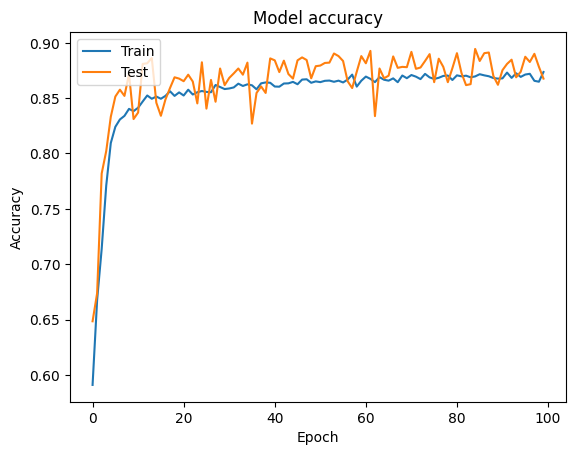

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Hyperparameter Tuning for CNN Model

In [36]:
def build_model(hp):
    model = Sequential([
                        Conv1D(filters = hp.Int('conv_1_filter', min_value = 32, max_value = 128, step = 16),
                               kernel_size = hp.Choice('conv_1_kernel', values = [2,5]), activation = 'relu', input_shape = (8, 1)),
                        Conv1D(filters = hp.Int('conv_2_filter', min_value = 32, max_value = 128, step = 16),
                               kernel_size = hp.Choice('conv_2_kernel', values = [2,3]), activation = 'relu'),
                        Conv1D(filters = hp.Int('conv_3_filter', min_value = 32, max_value = 128, step = 16),
                               kernel_size = hp.Choice('conv_3_kernel', values = [2]), activation = 'relu'),
                        SpatialDropout1D(rate = hp.Float('dropout_3', min_value = 0.1, max_value= 0.5, step = 0.1)),
                        MaxPooling1D(pool_size = 2),
                        Flatten(),
                        Dense(units = hp.Int('dense_1_units', min_value = 32, max_value = 256, step = 16), activation = 'relu'),
                        Dense(units = hp.Int('dense_2_units', min_value = 32, max_value = 256, step = 16), activation = 'relu'),
                        Dense(1, activation = 'sigmoid')
    ])

    # compilation of model
    model.compile(optimizer = tf.keras.optimizers.Adam(hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])),
                  loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [37]:
!pip install -q -U keras-tuner

In [38]:
# importing keras tuner
import keras_tuner as kt
#creating randomsearch object
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials = 10, overwrite = True)

# search best parameter
tuner.search(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), batch_size = 32)

Trial 10 Complete [00h 00m 00s]

Best val_accuracy So Far: 0.9000884294509888
Total elapsed time: 00h 31m 41s


In [52]:
tuner.results_summary(num_trials=1)

Results summary
Results in ./untitled_project
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 06 summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 2
conv_2_filter: 48
conv_2_kernel: 3
conv_3_filter: 64
conv_3_kernel: 2
dropout_3: 0.2
dense_1_units: 176
dense_2_units: 192
learning_rate: 0.001
Score: 0.9000884294509888


In [53]:
best_hp = tuner.get_best_hyperparameters(num_trials = 1)[0]
best_cnn_model = tuner.hypermodel.build(best_hp)
best_cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 7, 48)             144       
                                                                 
 conv1d_13 (Conv1D)          (None, 5, 48)             6960      
                                                                 
 conv1d_14 (Conv1D)          (None, 4, 64)             6208      
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 4, 64)            0         
 lDropout1D)                                                     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 2, 64)            0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 128)              

In [54]:
from keras.callbacks import ModelCheckpoint

# model checkpoint
file = 'Best_CNN_Model.hdf5'
checkpoint = ModelCheckpoint (file, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]

history = best_cnn_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, callbacks = callbacks_list)

Epoch 1/100
418/425 [============================>.] - ETA: 0s - loss: 0.6397 - accuracy: 0.6122
Epoch 1: val_accuracy improved from -inf to 0.70616, saving model to Best_CNN_Model.hdf5
425/425 [==============================] - 4s 6ms/step - loss: 0.6392 - accuracy: 0.6130 - val_loss: 0.5673 - val_accuracy: 0.7062
Epoch 2/100
415/425 [============================>.] - ETA: 0s - loss: 0.5543 - accuracy: 0.7276
Epoch 2: val_accuracy improved from 0.70616 to 0.82670, saving model to Best_CNN_Model.hdf5
425/425 [==============================] - 2s 5ms/step - loss: 0.5521 - accuracy: 0.7293 - val_loss: 0.4219 - val_accuracy: 0.8267
Epoch 3/100
424/425 [============================>.] - ETA: 0s - loss: 0.4750 - accuracy: 0.7921
Epoch 3: val_accuracy improved from 0.82670 to 0.84586, saving model to Best_CNN_Model.hdf5
425/425 [==============================] - 2s 5ms/step - loss: 0.4749 - accuracy: 0.7921 - val_loss: 0.3805 - val_accuracy: 0.8459
Epoch 4/100
423/425 [======================

# Evaluation

In [56]:
# Result of CNN Model
y_pred_cnn = best_cnn_model.predict(X_test)
cf_cnn = confusion_matrix(y_test, y_pred_cnn.round())
print(cf_cnn)
print(classification_report(y_test, y_pred_cnn.round()))
accuracy_cnn = accuracy_score(y_test, y_pred_cnn.round())
print("Best CNN accuracy score: %f" %accuracy_cnn)

107/107 [==============================] - 0s 2ms/step
[[1599   63]
 [ 310 1421]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1662
           1       0.96      0.82      0.88      1731

    accuracy                           0.89      3393
   macro avg       0.90      0.89      0.89      3393
weighted avg       0.90      0.89      0.89      3393

Best CNN accuracy score: 0.890068


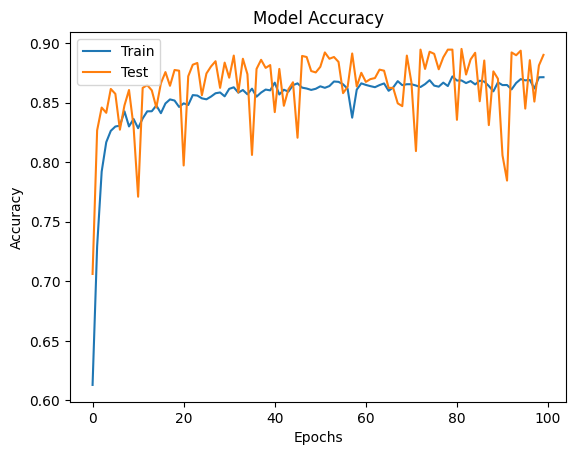

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()